![](https://upload.wikimedia.org/wikipedia/commons/thumb/4/45/Mass_spring_damper.svg/617px-Mass_spring_damper.svg.png)

# Mass-Spring-Damper

In [84]:

%matplotlib inline
from matplotlib import pyplot as plt

import numpy as np
import time
from control import ss,step_response, pzmap
import control

In [63]:
k = 1
c = 2
m = 2
A = np.array([[-c/m, -k/m],[1,0]])
B = np.array([[0],[1]])

>> damp: (array([0.70710678, 0.70710678]), array([0.70710678, 0.70710678]), array([-0.5+0.5j, -0.5-0.5j]))
>> pole: [-0.5+0.5j -0.5-0.5j]
>> zero: []


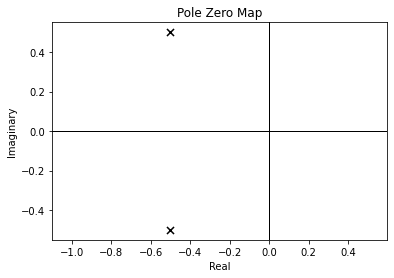

In [75]:
sys = ss(A,B,np.eye(2),0)
print(f">> damp: {sys.damp()}")
print(f">> pole: {sys.pole()}")
print(f">> zero: {sys.zero()}")
pzmap(sys)
t,z=step_response(sys)

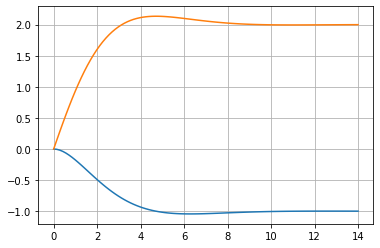

In [65]:
x=z.T
plt.plot(t,x[:,0],t,x[:,1])
plt.grid(True);

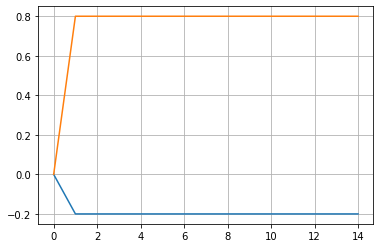

In [80]:
sys = ss(A,B,np.eye(2),0,.0001)
t,z=step_response(sys)
x=z.T
plt.plot(t,x[:,0],t,x[:,1])
plt.grid(True);

(array([-0.5+0.5j, -0.5-0.5j]), array([], dtype=float64))

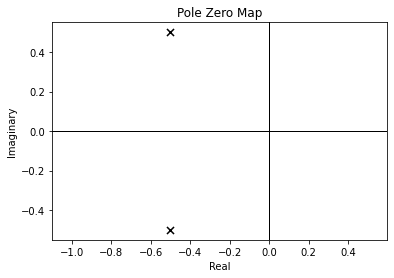

In [81]:
pzmap(sys)

In [93]:
def f(t, x, u, params):
    u = [0,0]
    
    # Parameter setup
    c = params.get('c', 2)
    m = params.get('m', 2)
    k = params.get('k', 1)

    # Compute the discrete updates
    dv = -c/m*x[0] -k/m*x[1] + u[0]
    dx = x[0] + u[1]

    return [dv, dx]

In [94]:
msd = control.NonlinearIOSystem(
    f, None, inputs=('u'), outputs=('v', 'x'),
    states=('v', 'x'), name='msd')

In [102]:
X0 = [0, 2]                 # Initial H, L
T = np.linspace(0, 70, 500)   # Simulation 70 years of time
p = {"c":2, "m":2, "k":1}

# Simulate the system
t, y = control.input_output_response(msd, T, 0, X0,params=p)

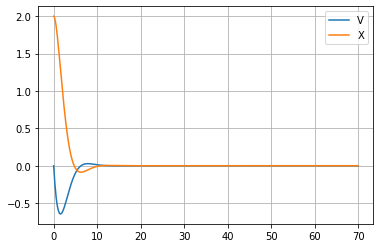

In [106]:
# Plot the response
plt.plot(t, y[0])
plt.plot(t, y[1])
plt.legend(['V', 'X'])
plt.grid(True)